## Chapter 2

## 2.1 Reviewing Market History

In [1]:
# 2.1.1
install.packages(c("PerformanceAnalytics", "timeSeries","TTR"), repos='http://cran.us.r-project.org')


Installing packages into 'C:/Users/Beau/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked
package 'timeSeries' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Beau\AppData\Local\Temp\Rtmp4KrkYx\downloaded_packages


In [4]:
# 2.1.2
library(PerformanceAnalytics)
data(managers)
sp500.ret <-managers$SP500
 
# 2.1.2
sp500.ret <-managers[,8]
 
# 2.1.3
plot(sp500.ret * 100,
     main="S&P 500: 1-month % returns",
     ylab="return",
     xlab="date")
 
# 2.1.4
sp500.index <-cumprod(1+sp500.ret)
plot(sp500.index,
     main="S&P 500 Index",
     ylab="price",
     xlab="date")
 
# 2.1.5
sp500.index <-cumprod(c(100,1+sp500.ret))
 
# 2.1.6
library(TTR)  
sp500.ret <-ROC(sp500.index, 1, "discrete", na.pad=F)
 
# 2.1.7
data.test <-cbind(managers$SP500, sp500.ret)
colnames(data.test)[2] <-c("sp500.ret.alt") #label 2nd column
head(data.test)
 
# 2.1.8
sp500.12mo.ret <-ROC(sp500.index, n=12, "discrete", na.pad=F)


ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

           SP500.TR sp500.ret.alt
1996-01-31   0.0340        0.0340
1996-02-29   0.0093        0.0093
1996-03-31   0.0096        0.0096
1996-04-30   0.0147        0.0147
1996-05-31   0.0258        0.0258
1996-06-30   0.0038        0.0038

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): unable to start png() device


plot without title

## 2.2 Plotting Multivariate Datasets

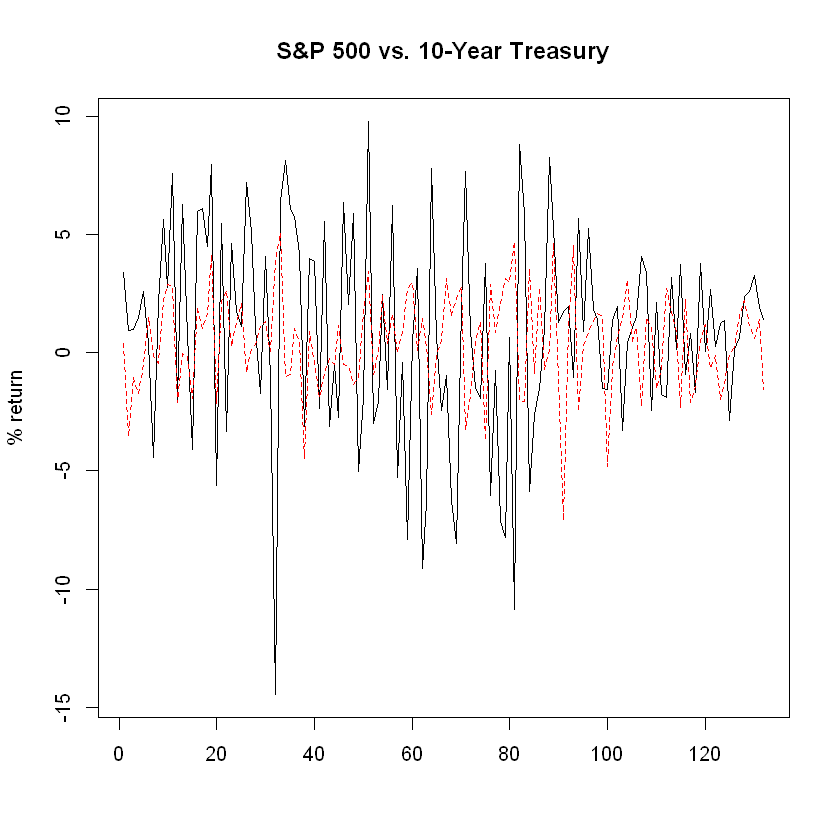

In [3]:
# 2.2.1
library(PerformanceAnalytics)
data(managers)
sp500.10yrT.ret <-managers[,8:9] * 100
matplot(sp500.10yrT.ret,
        main="S&P 500 vs. 10-Year Treasury",
        ylab="% return",
        type='l')


## 2.3 Risk Metrics

In [4]:
 
# 2.3.1
library(TTR)
library(PerformanceAnalytics)
data(managers)
vol <-apply(managers[,8:9], MARGIN=2, FUN=sd)
 
# 2.3.2
vol.annualized <-vol * sqrt(12)
 
# 2.3.3
library(TTR)
vol.roll <-na.omit(rollapply(data=managers[,8:9],
                             width=12, FUN=sd) * sqrt(12))
 
# 2.3.4
corr.matrix <-cor(na.omit(managers[,8:9]))



## 2.4 Volatility and Sharpe Ratios

In [2]:
?StdDev()

Warning message in file(out, "wt"):
"cannot open file 'C:\Users\Beau\AppData\Local\Temp\RtmpKGdNhv\file450844911270': No such file or directory"Warning message in file(con, "r"):
"cannot open file 'C:\Users\Beau\AppData\Local\Temp\RtmpKGdNhv\file450844911270': No such file or directory"ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("

StdDev {PerformanceAnalytics},R Documentation
R,"a vector, matrix, data frame, timeSeries or zoo object of asset returns"
...,any other passthru parameters
clean,"method for data cleaning through Return.clean. Current options are ""none"", ""boudt"", or ""geltner""."
portfolio_method,"one of ""single"",""component"" defining whether to do univariate/multivariate or component calc, see Details."
weights,"portfolio weighting vector, default NULL, see Details"
mu,"If univariate, mu is the mean of the series. Otherwise mu is the vector of means of the return series , default NULL, , see Details"
sigma,"If univariate, sigma is the variance of the series. Otherwise sigma is the covariance matrix of the return series , default NULL, see Details"
use,"an optional character string giving a method for computing covariances in the presence of missing values. This must be (an abbreviation of) one of the strings ""everything"", ""all.obs"", ""complete.obs"", ""na.or.complete"", or ""pairwise.complete.obs""."
method,"a character string indicating which correlation coefficient (or covariance) is to be computed. One of ""pearson"" (default), ""kendall"", or ""spearman"", can be abbreviated."


In [1]:
# 2.4.1
library(PerformanceAnalytics)
data(managers)
ret <- managers$SP500
round(StdDev(ret), 5)
 
# 2.4.2
round(StdDev(ret, clean=c("geltner")), 5)
 
# 2.4.3
round(StdDev.annualized(ret), 5)
 
# 2.4.4
round(SharpeRatio.annualized(ret, Rf=0.01/12), 3)


Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



StdDev,0.04331


Warning message in file(out, "wt"):
"cannot open file 'C:\Users\Beau\AppData\Local\Temp\RtmpKGdNhv\file450831592892': No such file or directory"Warning message in file(con, "r"):
"cannot open file 'C:\Users\Beau\AppData\Local\Temp\RtmpKGdNhv\file450831592892': No such file or directory"ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("

,SP500 TR
Annualized Standard Deviation,0.15003


,SP500 TR
Annualized Sharpe Ratio (Rf=1%),0.573


Round {base},R Documentation
x,"a numeric vector. Or, for round and signif, a complex vector."
digits,integer indicating the number of decimal places (round) or significant digits (signif) to be used. Negative values are allowed (see ‘Details’).
...,arguments to be passed to methods.


## 2.5 Sortino Ratio

In [6]:
 
# 2.5.1
round(SortinoRatio(ret), 3)
 


,SP500 TR
Sortino Ratio (MAR = 0%),0.306


## 2.6 Beta

In [7]:
# 2.6.1
library(PerformanceAnalytics)
data(managers)
CAPM.beta(Ra=managers$EDHEC, Rb=managers$SP500)
 
# 2.6.2
coef(lm(formula=managers$EDHEC ~ managers$SP500))


[1] 0.3355417

(Intercept) managers$SP500 
   0.006944482    0.335541688

## 2.7 Value at Risk

[1] -0.09448536

[1] 0.05

[1] -0.09448536 -0.16263479 -0.23902323

5% 
-0.06691

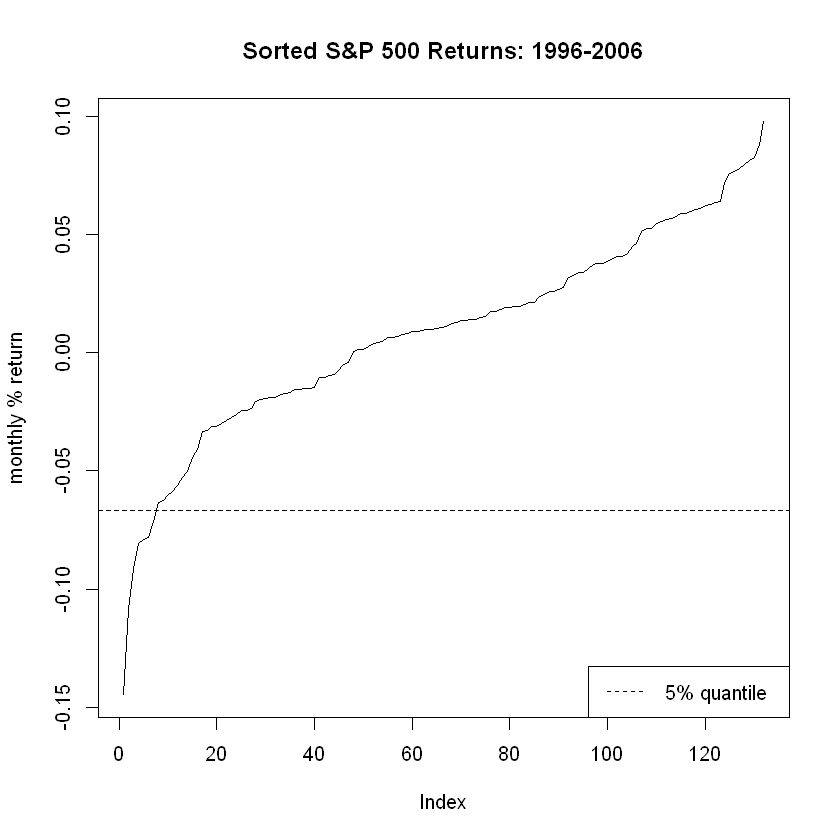

In [8]:
 
# 2.7.1
qnorm(p=0.05, mean=0.07, sd=0.10)
 
# 2.7.2
pnorm(q=-0.09448536, mean=0.07, sd=0.10)
 
# 2.7.3
qnorm(p=c(0.05, 0.01, 0.001), mean=0.07, sd=0.10) 
 
# 2.7.4
set.seed(89)
ret.sim <-rnorm(10000, mean=0.07, sd=0.10)
ret.sim.var <-quantile(ret.sim, c(0.05, 0.01, 0.001))
 
# 2.7.5
library(PerformanceAnalytics)
data(managers)
quantile(managers$SP500, 0.05)
 
# 2.7.6
sp500.sort <-sort(as.numeric(managers$SP500))
sp500.sort.var95 <-quantile(sp500.sort,0.05)
 
plot(sp500.sort,
     type='l', 
     main="Sorted S&P 500 Returns: 1996-2006",
     ylab="monthly % return")
abline(h=sp500.sort.var95, lty=2)
legend(lty=2, "bottomright", c("5% quantile"))
 


## 2.8 Short-Fall Risk

In [9]:
# 2.8.1
library(PerformanceAnalytics)
data(managers)
pnorm(q=0, 
      mean=mean(managers$SP500), 
      sd=sd(managers$SP500),
      lower.tail=TRUE) 
 
# 2.8.2
mean(managers$SP500)
 
# 2.8.3
pnorm(q=0, 
      mean=mean(managers$SP500), 
      sd=sd(managers$SP500),
      lower.tail=FALSE)
 
# 2.8.4
prob.below.0 <-pnorm(q=0, 
                     mean=mean(managers$SP500),
                     sd=sd(managers$SP500),
                     lower.tail=TRUE)
 
# 2.8.5
prob.above.0 <-pnorm(q=0, 
                     mean=mean(managers$SP500),
                     sd=sd(managers$SP500),
                     lower.tail=FALSE)
sum(prob.below.0, prob.above.0)
 

[1] 0.4207088

[1] 0.008665341

[1] 0.5792912

[1] 1

## 2.9 Drawdown

From,Trough,To,Depth,Length,To Trough,Recovery
2000-09-30,2002-09-30,2006-10-31,-0.4473,74,25,49
1998-07-31,1998-08-31,1998-11-30,-0.1537,5,2,3
2000-01-31,2000-02-29,2000-03-31,-0.0682,3,2,1


Loading required package: timeDate

Attaching package: 'timeDate'

The following objects are masked from 'package:PerformanceAnalytics':

    kurtosis, skewness


Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-



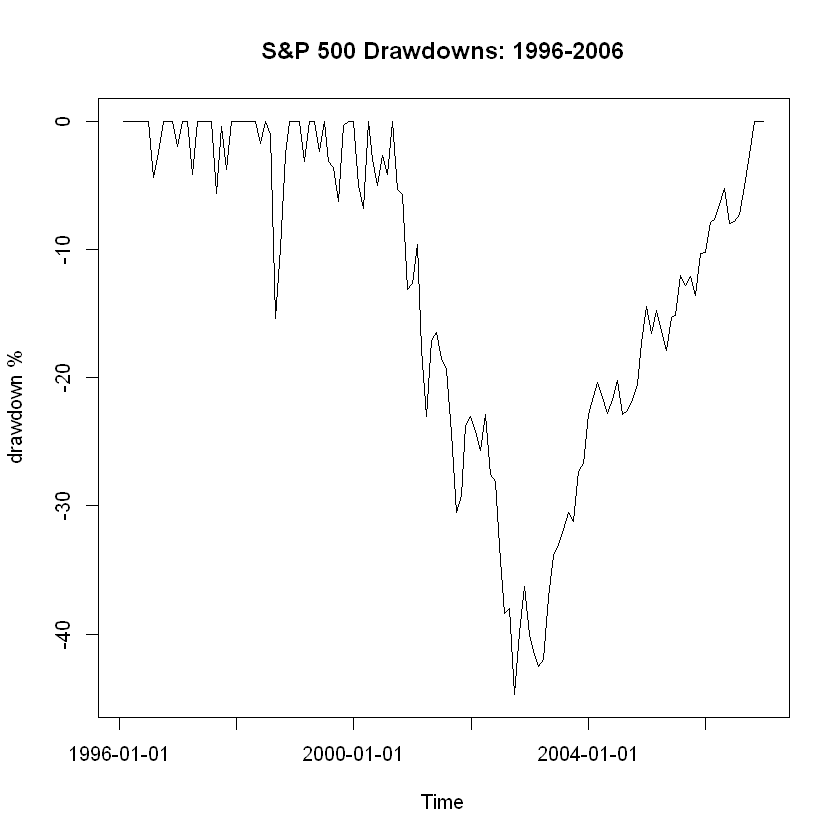

In [13]:
# 2.9.1
library(PerformanceAnalytics)
data(managers)
table.Drawdowns(managers$SP500, top=3)
 
# 2.9.2
library(timeSeries)
dd.history <-drawdowns(timeSeries(managers$SP500))
plot(dd.history * 100,
     type="l",
     main="S&P 500 Drawdowns: 1996-2006",
     ylab="drawdown %")
 

In [ ]:
#############
# Chapter 3 #
#############
 
# 3.1.1
library(PerformanceAnalytics)
data(managers)
sp500.10yrT.ret <-managers[,8:9]
 
wgt.60.40 <-c(0.6, 0.4) # set target weights
port.60.40.rebal <-Return.portfolio(sp500.10yrT.ret,
                                    rebalance_on="years",
                                    weights=wgt.60.40,
                                    wealth.index=TRUE)
 
port.60.40.norebal <-Return.portfolio(sp500.10yrT.ret,
                                      weights=wgt.60.40,
                                      wealth.index=TRUE)
 
rebal.wi.1 <-cbind(port.60.40.rebal,
                   port.60.40.norebal)
colnames(rebal.wi.1) <-c("Rebal", "No Rebal")
 
matplot(rebal.wi.1,
        main="Wealth Indexes",
        ylab="",
        xlab="",
        type="l",
        lty=1,
        col=c("black", "gray"))
legend(lty=c(1),"topleft",
       c(colnames(rebal.wi.1)),
       col=c("black", "gray"))
legend("bottomright", c("Dec. 31, 1995 = 1.0"))
 
 
# 3.1.2
library(TTR)
rebal.wi.1.ret <-ROC(rebal.wi.1, n=1, type="discrete", na.pad=F)
port.60.40.ret <-Return.annualized(rebal.wi.1.ret , scale=12)
port.60.40.sd <-apply(rebal.wi.1.ret , 2, sd) * sqrt(12)
port.60.40.sr <-SharpeRatio.annualized(rebal.wi.1.ret)
port.60.40.sortino <-SortinoRatio(rebal.wi.1.ret)
 
risk.ret.60.40 <-round(rbind(port.60.40.ret,
                       port.60.40.sd,
                       port.60.40.sr,
                       port.60.40.sortino), 3)
rownames(risk.ret.60.40) <-c("Annlz'd return:",
                             "Annlz'd volatility:",
                             "Annlz'd Sharpe Ratio:",
                             "Annlz'd Sortino Ratio")
risk.ret.60.40
 
# 3.2.1
library(PerformanceAnalytics)
data(managers)
prices <-apply(managers[,8:9], 2, function(x) cumprod(1+x))
prices.xts <-xts(prices,  order.by=index(managers[,8:9]))
sig.1 <-prices.xts / rollmean(prices.xts, k=10, align=c("right"))
sig.2 <-apply(sig.1, 2, function(x) ifelse(x >1, yes=1, no=0))
sig.3 <-xts(sig.2, as.Date(index(tail(managers, nrow(sig.2)))))
sig.lag <-na.omit(lag(sig.3))
 
# 3.2.2
strategy.ret <-na.omit(managers[,8:9] * sig.lag)
 
# 3.2.3
strategy.wi <-cumprod(1 + strategy.ret)
 
# 3.2.4
wgt.60.40 <-c(0.6, 0.4) # set target weights
strategy.wi.wgt <-sweep(strategy.wi, 
                        MARGIN=2, 
                        STATS=wgt.60.40, 
                        FUN="*")
 
# 3.2.5
taa.wi <-xts(apply(strategy.wi.wgt, 1, sum),
             as.Date(index(strategy.wi.wgt)))
 
# 3.2.6
wi.3.ret <-na.omit(ROC(cbind(port.60.40.rebal,
                             port.60.40.norebal,
                             taa.wi),
                       1, "discrete"))
wi.3 <-xts(apply(wi.3.ret, 2, function(x) cumprod(1+x)),
           as.Date(index(wi.3.ret)))
colnames(wi.3) <-c("Rebal", "No Rebal", "Tactical")
 
matplot(wi.3,
        main="Wealth Indexes",
        ylab="",
        xlab="",    
        type="l",
        col=c("black", "gray", "black"))
legend(lty=c(1,1,3),"topleft", 
       c(colnames(wi.3)), 
       col=c("black", "gray", "black"))
legend("bottomright", c("Nov. 30, 1996 = 1.0"))
 
# 3.2.7
wi.3.monthly.ret <-ROC(wi.3, n=1, type="discrete", na.pad=F)
wi.3.annl.ret <-Return.annualized(wi.3.monthly.ret , scale=12)
wi.3.sd <-apply(wi.3.monthly.ret , 2, sd) * sqrt(12)
wi.3.sr <-SharpeRatio.annualized(wi.3.monthly.ret)
 
risk.ret.wi.3 <-round(rbind(wi.3.annl.ret,
                            wi.3.sd,
                            wi.3.sr), 3)
rownames(risk.ret.wi.3) <-c("Annlz'd return:",
                             "Annlz'd volatility:",
                             "Annlz'd Sharpe Ratio:")
risk.ret.wi.3
 

In [ ]:
#############
# Chapter 4 #
#############
 
# 4.1.1
library(PerformanceAnalytics)
data(managers)
ret <-na.omit(managers[,5:10])
 
# 4.1.2
cov.mat <-cov(ret)                     # create covariance matrix
n.col <- ncol(cov.mat)                 # number of columns
zero.mat <- array(0, dim=c(n.col,1)) # create matrix of zeros
one.mat <- matrix (1, nrow=n.col)    # create matrix of ones
bvec.1 <- 1
meq.1 <- 1
 
library(quadprog)
mv.port <-solve.QP(Dmat=cov.mat,
                   dvec=zero.mat,
                   Amat=one.mat,
                   bvec=bvec.1,
                   meq=meq.1)
 
mv.port.wgt <- round(as.matrix(mv.port$solution) * 100, digits=2)
rownames(mv.port.wgt) <-c(names(ret))
colnames(mv.port.wgt) <-c("MVP % weights")
 
# 4.1.3
cov.mat <-cov(ret)                         
n.col <- ncol(cov.mat)                               
zero.mat <- array(0, dim=c(n.col,1)) 
meq.1 <- 1
one.zero.diagonal <- cbind(1, diag(n.col))      # add diagonal of ones
bvec.1.vector <- as.matrix(c(1, rep(0, n.col))) # add vector of zeros
                                                # following lead
                                                # value of 1
 
 
mv.port.noshort <-solve.QP(Dmat=cov.mat, 
                   dvec=zero.mat, 
                   Amat=one.zero.diagonal, 
                   bvec=bvec.1.vector, 
                   meq=meq.1)
 
mv.port.noshort.wgt <- round(as.matrix(mv.port.noshort$solution) 
                             * 100, 
                             digits = 2)
rownames(mv.port.noshort.wgt) <-c(names(ret))
colnames(mv.port.noshort.wgt) <-c("MVP % weights")
 
# 4.1.4
cov.mat <-cov(ret)      # create covariance matrix                       
n.col <- ncol(cov.mat)  # file containing the number of ETFs                             
zero.mat <- array(0, dim = c(n.col,1)) 
one.zero.diagonal.a <- cbind(1, diag(n.col), 
                             1*diag(n.col), 
                             -1*diag(n.col))
 
min.wgt <-rep(0.1, n.col) # lower constraint
max.wgt <-rep(0.5, n.col) # upper constraint
      
bvec.1.vector.a <- c(1, rep(0, n.col), 
                     min.wgt, 
                     -max.wgt)                       
meq.1 <- 1
 
mv.port.noshort.a <-solve.QP(Dmat=cov.mat,
                             dvec=zero.mat,
                             Amat=one.zero.diagonal.a,
                             bvec=bvec.1.vector.a,
                             meq = meq.1)
 
mv.port.noshort.wgt.a <- round(as.matrix(mv.port.noshort.a$solution) 
                               * 100, 
                               digits = 2)
rownames(mv.port.noshort.wgt.a) <-c(names(ret))
colnames(mv.port.noshort.wgt.a) <-c("MVP % weights")
 
# 4.2.1
library(xts)
library(TTR)
library(fPortfolio)
library(fAssets)
library(DEoptimR)
library(timeSeries)
ret.ts <-as.timeSeries(na.omit(managers[, 5:10])) # format returns 
                                                  # as timeSeries 
                                                  # object 
n.col <-ncol(ret.ts)
 
# 4.2.2
min.max <- c("minW[1:n.col]=0.1", "maxW[1:n.col]=0.5")
 
# 4.2.3
min.var.constraints <- minvariancePortfolio(ret.ts,
                               constraints=min.max)
round(min.var.constraints@portfolio@portfolio$weights * 100, 2)
 
# 4.2.4
eff.frontier <-portfolioFrontier(ret.ts)
 
# 4.2.5
min.max.1 <- c("minW[1:n.col]=0.1",
               "maxW[1:n.col]=0.5",
               "minsumW[c(1:3)]=0.35",
               "maxsumW[c(1:3)]=0.45")
 
min.var.constraints.1 <-minvariancePortfolio(ret.ts,
                                             constraints = min.max.1)
round(min.var.constraints.1@portfolio@portfolio$weights * 100,2)
 

# 5

In [ ]:
#############
# Chapter 5 #
#############
 
# 5.1.1
library(xts)
download.file("http://bit.ly/2ikMUxn",
              destfile="F-F_Research_Data_Factors.zip", mode='wb')
unzip("F-F_Research_Data_Factors.zip")
ff.factors<-read.delim('F-F_Research_Data_Factors.txt',
                      sep="",
                      nrows=1067,
                      header=FALSE,
                      skip=4,
                      stringsAsFactors=FALSE)
 
names(ff.factors) <- c("Date", "MKT", "SMB", "HML", "RF")
 
ff.factors.3 <-ff.factors[,2:4]
dates.1 <-as.yearmon(as.character(ff.factors$Date), "%Y%m")
 
ff.factors.dates <-xts(as.matrix(ff.factors.3), as.Date(dates.1))
 
# 5.1.2
library(PerformanceAnalytics)
data(managers)
sp500.ret.tbill <-to.monthly(managers[,c(8,10)], 
                             indexAt='firstof',OHLC=F)
sp500.ret.premium <-sp500.ret.tbill[,1] - sp500.ret.tbill[,2]
colnames(sp500.ret.premium) <-c("SP500")
 
# 5.1.3
sp500.dates <-as.Date(index(sp500.ret.premium))
ff.factors.subset <-ff.factors.dates[paste0(sp500.dates)] * 0.01
ff.factors.sp500.ret.premium <-cbind(ff.factors.subset, 
                                     sp500.ret.premium)
 
# 5.1.4
sp500.factors <-lm(SP500 ~ ., data = ff.factors.sp500.ret.premium)
 
# 5.1.5
summary(sp500.factors)
 
# 5.1.6
rp.estimate <-sp500.factors$coefficients[1] +
  sp500.factors$coefficient[2] * ff.factors.sp500.ret.premium$MKT +
  sp500.factors$coefficient[3] * ff.factors.sp500.ret.premium$SMB +
  sp500.factors$coefficient[4] * ff.factors.sp500.ret.premium$HML
 
plot(as.numeric(sp500.ret.premium ), 
     as.numeric(rp.estimate),
     main="Fama French 3-factor model for S&P 500",
     ylab="estimated premia",
     xlab="historical premia")
grid()
 
# 5.2.1
library(PerformanceAnalytics)
data(managers)
ret <-na.omit(managers[,1:6])
fit <-factanal(ret, factors=1)
 
# 5.2.2
plot(prcomp(ret))
 
# 5.2.3
ret.pc <-prcomp(ret)
print(summary(ret.pc),digits=3)
 
# 5.2.4
wgt.1 <-apply(ret.pc$rotation,2,function(x) x/sum(x))
round(wgt.1,4)
 
# 5.2.5
sum(wgt.1[,1])
 
# 5.2.6
library(quantmod)
symbols <-c("SPY", "AGG", "EFA", "EEM", "OIL")
getSymbols(symbols, src = "yahoo", auto.assign=T)
prices <- do.call(merge, lapply(symbols, function(x) Cl(get(x))))
colnames(prices) <-symbols 
 
# 5.2.7
ret <-na.omit(ROC(prices['2007-12-31::2016-12-31'], 
                  1, 
                  "discrete", 
                  na.pad = FALSE))
 
fit <-prcomp(ret)
factors.1 <-round(fit$rotation,3)
 
# 5.2.8
wgt.a <-apply(fit$rotation,2,function(x) x/sum(x)) 
round(wgt.a[,1],2)

In [1]:
# 6.1.1
library(PerformanceAnalytics)
data(managers)
ret.sp500 <-managers$SP500 # actual S&P returns for 1996-2006
set.seed(994)
ret.sp500.sim.1 <-sample(ret.sp500, replace=T)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



In [ ]:
#############
# Chapter 6 #
#############
 
# 6.1.1
library(PerformanceAnalytics)
data(managers)
ret.sp500 <-managers$SP500 # actual S&P returns for 1996-2006
set.seed(994)
ret.sp500.sim.1 <-sample(ret.sp500, replace=T)
 
# 6.1.2
ret.all <-cbind(ret.sp500, as.numeric(ret.sp500.sim.1))
matplot(ret.all, type='l')
 
# 6.1.3
set.seed(645)
ret.sp500.sim.2 <-sample(as.numeric(ret.sp500), 
                         size=1000, 
                         replace=T)
 
# 6.1.4
library(PerformanceAnalytics)
data(managers)
ret.a <-managers[,8:10]
set.seed(44)
ret.a.sim <-apply(ret.a, 2, function(x) sample(x, replace=T))
ret.a.sim.1 <-xts(ret.a.sim, order.by=as.Date(index(ret.a)))
 
# 6.1.5
library(PerformanceAnalytics)
data(managers)
ret.a <-managers[,8:10]
wgt.a <-c(0.6, 0.3, 0.1)
 
fun.a <-function(i, j) { # i=ret.a, j=wgt.a
   
  ret <-apply(i, 2, function(x) sample(x, replace=T))
  ret.1 <-xts(ret, as.Date(index(i)))
   
  port.a <-Return.portfolio(ret.1,
                          rebalance_on="years",
                          weights=j,
                          wealth.index=T)}
 
# 6.1.6
library(PerformanceAnalytics)
data(managers)
ret.a <-managers[,8:10]
set.seed(48)
port.sim.test <-fun.a(ret.a, wgt.a)
head(port.sim.test)
 
# 6.1.7
set.seed(48)
port.sim.a <-do.call(cbind, 
                    lapply(1:5, function(x) fun.a(ret.a, wgt.a)))
 
# 6.1.8
port.actual <-Return.portfolio(ret.a,
                               rebalance_on="years",
                               weights=wgt.a,
                               wealth.index=T)
 
# 6.1.9
wi.all <-cbind(port.actual, port.sim.a)
matplot(wi.all[,2:6], 
        col="gray", 
        type='l', 
        ylab="", 
        main="Wealth Indexes")
par(new=T)
matplot(wi.all[,1], 
        col="black", 
        type='l', 
        yaxt="n", 
        xaxt="n", 
        ylab="", 
        lwd=2)
legend("bottomright", 
       c("simulated", "actual"), 
       fill=c("gray", "black"))
 
# 6.2.1
set.seed(401)
ret <- rnorm(100, mean=0.05, sd=0.10)
prices <-cumprod(1 + ret)
 
# 6.2.2
prices.a <-cumprod(c(66.8, 1+ret))
 
# 6.2.3
library(PerformanceAnalytics)
data(managers)
mean.ret <-apply(managers[,8], 2, mean)
 
sd.1 <-apply(managers[,8], 2, sd)
 
# 6.2.4
set.seed(49)
sp500.sim <-rnorm(100, mean=mean.ret, sd=sd.1) 
head(sp500.sim, 3)
 
# 6.2.5
set.seed(49)
sp500.sim.a <-xts(rnorm(nrow(managers[,8]), 
                        mean=mean.ret, sd=sd.1),
                 as.Date(index(managers[,8])))
head(sp500.sim.a)
 
# 6.2.6
library(PerformanceAnalytics)
library(MASS)
set.seed(782)
assets.sim <-mvrnorm(n=nrow(managers[,8:10]),
                    mu=colMeans(managers[,8:10]),
                                Sigma=var(managers[,8:10]))
 
# 6.2.7
colMeans(managers[,8:10])
colMeans(assets.sim)
 
# 6.2.8
apply(managers[,8:10], 2, sd)
apply(assets.sim, 2, sd)
 
# 6.3.1
set.seed(23)
tdist.ret <-rt(100000, df=13) * 0.01
 
# 6.3.2
library(quantmod)
library(MASS)
library(PerformanceAnalytics)
spy.ret <-managers[,8]
spy.t.model <-fitdistr(spy.ret, "t")
 
# 6.3.3
set.seed(77)
norm.ret <-rnorm(100000, mean=0.05/252, sd=0.15/sqrt(252))
 
# 6.3.4
library(PerformanceAnalytics)
t.kurt <-kurtosis(tdist.ret)
norm.kurt <-kurtosis(norm.ret)
 
t.kurt
norm.kurt
 
# 6.3.5
set.seed(77)
norm.ret <-rnorm(100, mean=0.05/252, sd=0.15/sqrt(252))
prices.a <-cumprod(1+norm.ret)
plot(prices.a,type='l', main="Wealth Index")
 
# 6.3.6
library(mvtnorm)
library(QRM)
library(PerformanceAnalytics)
data(managers)
fit <- fit.mst(managers[,8:10]) # fit t distribution model
mu <- fit$mu # extract mean returns
Sigma <- as.matrix(fit$Sigma) # create volatility matrix
nu <- fit$df # extract degrees of freedom
n <- nrow(managers[,8:10]) # set number of rows 
 
set.seed(198)
sim.dat <-rmvt(n=n, sigma=Sigma, df=nu, delta=mu) # simulate data
 
# convert to xts file
sim.dat.xts <-xts(sim.dat, as.Date(index(managers[,8:10])))
 
# 6.4.1
library(PerformanceAnalytics)
data(managers)
ret.1 <-managers[,c(1,3,4,8)]
colnames(ret.1) <-c("HF-A", "HF-B", "HF-C", "SP500")
 
coefficients.1 <-lm(ret.1$SP500 ~ ., data=ret.1)
 
coefficients.1
 
# 6.4.2
coef.1 <-function(equation, data, x) {
  a <-data[x,]
  output <-lm(equation, data=a)
  return(coef(output))
}
 
# 6.4.3
library(boot)
set.seed(61)
results <- boot(data=ret.1, 
                statistic=coef.1,
                R=1000, 
                equation=SP500 ~ .)
 
# 6.4.4
results.ci <-boot.ci(results, type="basic", index=2)
results.ci
 
# 6.4.5
plot(results, index=2)
 
 